<h1><center>Arunaggiri Pandian Karunanidhi</center></h1>

## Approach - 1

#### A. Using R, load the /public/bmort/R/wheat.csv data set into a data frame. Are there any missing values? Perform any necessary data imputation on the data set.

In [64]:
df = read.csv("/public/bmort/R/wheat.csv")

In [65]:
dim(df)

[1] 200   8

In [66]:
head(df, 5)

area,perimeter,compactness,length,width,asymmetry,groove,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,A
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,A
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,A
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,A
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,A


In [67]:
print(ncol(df))
print(nrow(df))

[1] 8
[1] 200


In [68]:
# count the missing values by column wise
print("Count of missing values by column wise")
sapply(df, function(x) sum(is.na(x)))

[1] "Count of missing values by column wise"


area   perimeter compactness      length       width   asymmetry 
          0           0           0           0           1           0 
     groove        type 
          0           0

Width column has 1 missing value

In [69]:
# finding mode value

find_mode <- function(x) {
  u <- unique(x)
  tab <- tabulate(match(x, u))
  u[tab == max(tab)]
}

mode_val = find_mode(df$width)

In [70]:
# replacing null value with mode value

# which(is.na(df$width))
df$width[8] = mode_val

In [71]:
sapply(df, function(x) sum(is.na(x)))

area   perimeter compactness      length       width   asymmetry 
          0           0           0           0           0           0 
     groove        type 
          0           0

#### B. Produce a table of summary statistics on the data set. How do the ranges of the values in the columns compare? Does each column of data have similar magnitudes and ranges? Are there any outliers?

In [72]:
summary(df)

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.38   1st Qu.:13.47   1st Qu.:0.8583   1st Qu.:5.257  
 Median :14.40   Median :14.38   Median :0.8745   Median :5.534  
 Mean   :14.94   Mean   :14.60   Mean   :0.8721   Mean   :5.639  
 3rd Qu.:17.41   3rd Qu.:15.78   3rd Qu.:0.8879   3rd Qu.:6.009  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
     width         asymmetry          groove      type  
 Min.   :2.642   Min.   :0.7651   Min.   :4.519   A:68  
 1st Qu.:2.965   1st Qu.:2.4935   1st Qu.:5.043   B:69  
 Median :3.244   Median :3.5915   Median :5.226   C:63  
 Mean   :3.272   Mean   :3.6627   Mean   :5.414         
 3rd Qu.:3.564   3rd Qu.:4.7043   3rd Qu.:5.879         
 Max.   :4.033   Max.   :8.4560   Max.   :6.550         

## Each column of data have a different magnitude and range so let's normalize it

In [73]:
# normalize data

normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}


In [74]:
df$area = normalize(df$area)
df$perimeter = normalize(df$perimeter)
df$length = normalize(df$length)
df$width = normalize(df$width)
df$asymmetry = normalize(df$asymmetry)
df$groove = normalize(df$groove)
df$compactness = normalize(df$compactness)

In [76]:
summary(df)

      area          perimeter       compactness         length      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1688   1st Qu.:0.2190   1st Qu.:0.4555   1st Qu.:0.2017  
 Median :0.3602   Median :0.4070   Median :0.6025   Median :0.3575  
 Mean   :0.4112   Mean   :0.4524   Mean   :0.5804   Mean   :0.4164  
 3rd Qu.:0.6438   3rd Qu.:0.6968   3rd Qu.:0.7244   3rd Qu.:0.6249  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     width          asymmetry          groove       type  
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   A:68  
 1st Qu.:0.2324   1st Qu.:0.2247   1st Qu.:0.2578   B:69  
 Median :0.4324   Median :0.3675   Median :0.3481   C:63  
 Mean   :0.4528   Mean   :0.3768   Mean   :0.4408         
 3rd Qu.:0.6627   3rd Qu.:0.5122   3rd Qu.:0.6696         
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000         

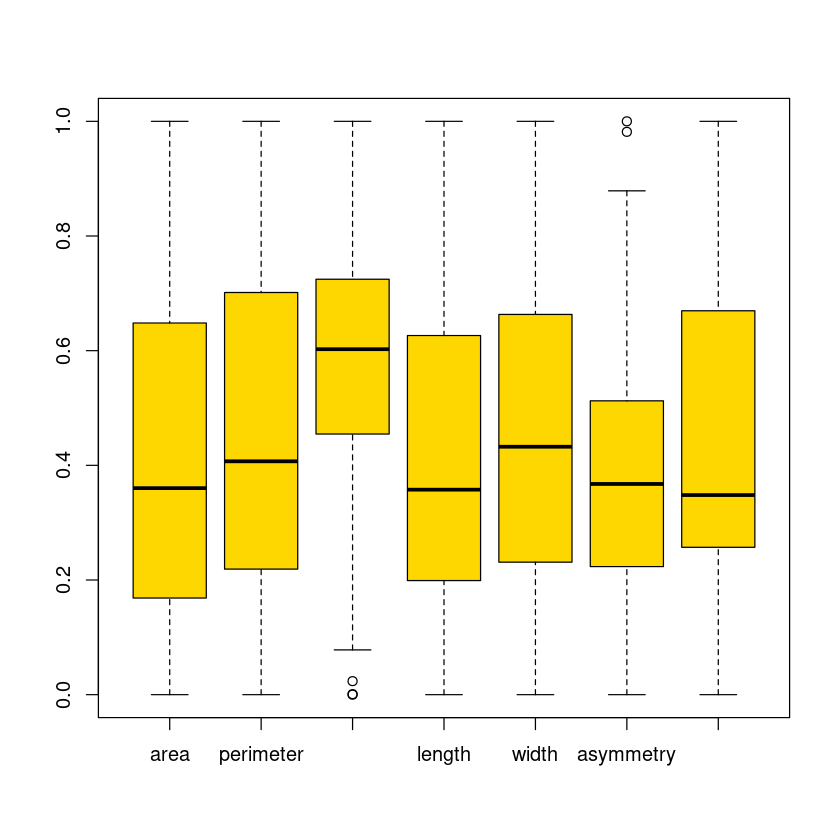

In [83]:
out = df[1:7]
boxplot(out, col='gold')

### Compactness column and groove column have outliers <br>

In [17]:
# # replacing outlier values with NaN values

# # Outlier Calculation

# ##Function to calculate outliers

# # FindOutliers <- function(data) {
# #   lowerq = quantile(data)[2]
# #   upperq = quantile(data)[4]
# #   iqr = upperq - lowerq #Or use IQR(data)
# #   # we identify extreme outliers
# #   extreme.threshold.upper = (iqr * 3) + upperq
# #   extreme.threshold.lower = lowerq - (iqr * 3)
# #   result <- which(data > extreme.threshold.upper | data < extreme.threshold.lower)
# # }

# FindOutliers <- function(data) {
#   lowerq = quantile(data)[2]
#   upperq = quantile(data)[4]
#   iqr = upperq - lowerq #Or use IQR(data)
#   # we identify extreme outliers
#   extreme.threshold.upper = (iqr * 3) + upperq
#   extreme.threshold.lower = lowerq - (iqr * 3)
#   result <- which(data > extreme.threshold.upper | data < extreme.threshold.lower)
#   length(result)
# }
# apply(out, 2, FindOutliers)

In [18]:
# Replacing outlier values with NaN values

for (x in c('compactness','asymmetry'))
{
  value = df[,x][df[,x] %in% boxplot.stats(df[,x])$out]
  df[,x][df[,x] %in% value] = NA
} 

In [19]:
#Checking whether the outliers in the above defined columns are replaced by NULL or not

print(sum(is.na(df$compactness)))
print(sum(is.na(df$asymmetry)))

[1] 3
[1] 2


In [20]:
sapply(df, function(x) sum(is.na(x)))

area   perimeter compactness      length       width   asymmetry 
          0           0           3           0           0           2 
     groove        type 
          0           0

In [21]:
# # finding mode value

# find_mode <- function(x) {
#   u <- unique(x)
#   tab <- tabulate(match(x, u))
#   u[tab == max(tab)]
# }

# mode_val = find_mode(df$compactness)

In [22]:
# # replacing null value with mode value in compactness column

# index = which(is.na(df$compactness))
# print(index)

# for (i in index)
# {
#     df$compactness[i] = mode_val
# }
# # df$width[8] = mode_val

In [23]:
# # replacing null value with mode value in asymmetry column

# index = which(is.na(df$asymmetry))
# index

# for (i in index)
# {
#     df$asymmetry[i] = mode_val
# }

In [24]:
# sapply(df, function(x) sum(is.na(x)))

In [25]:
# now let's remove the rows that has null values

#Removing the null values

library(tidyr)
df = drop_na(df)
as.data.frame(colSums(is.na(df)))
# sapply(df, function(x) sum(is.na(x)))

,colSums(is.na(df))
,<dbl>
area,0
perimeter,0
compactness,0
length,0
width,0
asymmetry,0
groove,0
type,0


## All Outliers have been removed

#### C. Using the corrplot library's corrplot() function, generate a plot showing the correlations between the numerical data in the data set. Show the command used to generate the plot and include the plot in your output.

corrplot 0.84 loaded


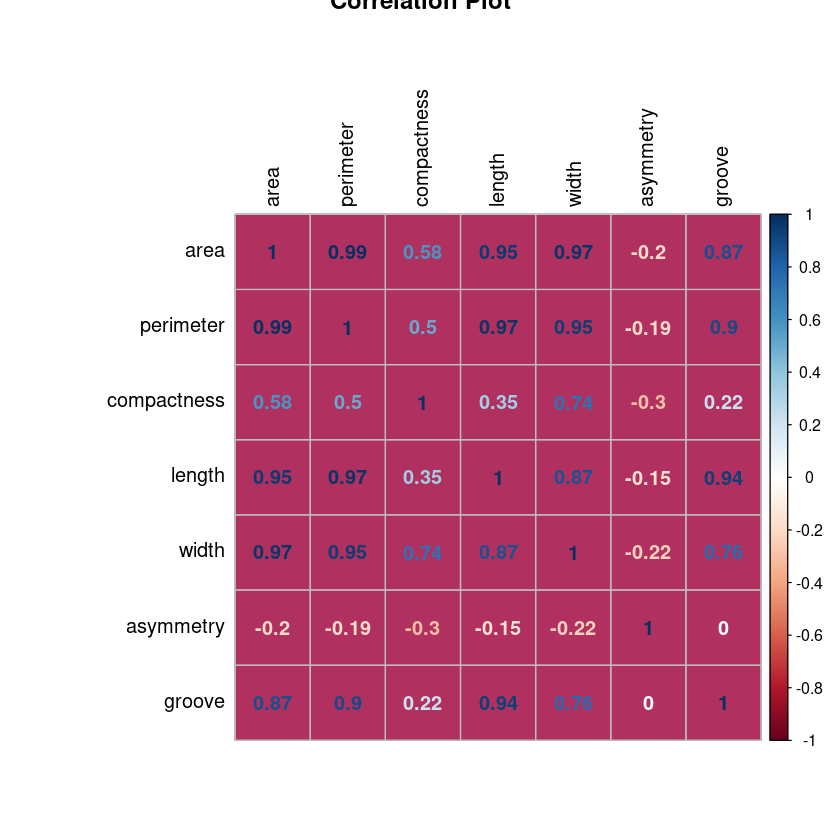

In [26]:
library(corrplot)
relation = cor(out)
corrplot(relation, title='Correlation Plot', bg='maroon', method='number', tl.col='black')

#### D. Partition the beans data set so that 80% will be used for training and 20% will be used for testing your machine learning model. You can do the partition manually at random or use the createDataPartition() function in R's caret library. 

In [8]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [35]:
intrain <- createDataPartition(y = df$type, p= 0.8, list = FALSE)
train <- df[intrain,]
test <- df[-intrain,]

In [36]:
dim(train)

[1] 158   8

In [37]:
dim(test)

[1] 37  8

#### E. Use the support vector machine (SVM) method with a linear basis function kernel from R's caret library to generate a machine learning model for the 7 types of wheat seeds based on some or all features provided in the data set. Using the caret library's trainControl() function, check your model parameter and feature selection by performing repeated cross-validation (with 5-folds) on the training data for your model. Consult the caret library documentation as needed.

In [33]:
train[["type"]] = factor(train[["type"]])

In [43]:
unique(train['type'])

,type
,<fct>
2,A
69,B
138,C


In [44]:
# using repeated CV with 5 folds

trctrl <- trainControl(method = "repeatedcv", number = 5)

In [47]:
# Using SVM with linear basis function

svm_linear <- train(type ~., data = train, method = "svmLinear",trControl=trctrl, tuneLength = 5) 

In [48]:
svm_linear

Support Vector Machines with Linear Kernel 

158 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 127, 126, 126, 127, 126 
Resampling results:

  Accuracy   Kappa    
  0.9243952  0.8865593

Tuning parameter 'C' was held constant at a value of 1

#### F. Use the test data set (i.e. the 20% of the data that was kept aside earlier) to generate a final validation for your model with the predict() function in the caret library. Comment on the accuracy of the model. 

In [49]:
# let's apply our model to the test set 

test_pred <- predict(svm_linear, newdata = test)
test_pred

[1] A A A A A A A A A A A A A B B B B B B B B B B B B B C C C A C C C C A A A
Levels: A B C

In [ ]:
# Compute model prediction accuracy rate

mean(test_pred == test$type)

In [52]:
confusionMatrix(table(test_pred, test$type))

Confusion Matrix and Statistics

         
test_pred  A  B  C
        A 13  0  4
        B  0 13  0
        C  0  0  7

Overall Statistics
                                          
               Accuracy : 0.8919          
                 95% CI : (0.7458, 0.9697)
    No Information Rate : 0.3514          
    P-Value [Acc > NIR] : 1.275e-11       
                                          
                  Kappa : 0.8359          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            1.0000   1.0000   0.6364
Specificity            0.8333   1.0000   1.0000
Pos Pred Value         0.7647   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   0.8667
Prevalence             0.3514   0.3514   0.2973
Detection Rate         0.3514   0.3514   0.1892
Detection Prevalence   0.4595   0.3514   0.1892
Balanced Accuracy      0.9167   1.0000   0.8182

### The accuracy of the model is 89.19%

#### G. Based on your model, classify the beans provided in the unlabeled /public/bmort/R/wheat-unknown.csv data set. Indicate which classification of the 7 available types has been assigned to each of the unlabeled seeds

In [60]:
unknown = read.csv('/public/bmort/R/wheat-unknown.csv')
dim(unknown)

[1] 10  7

In [61]:
test_pred <- predict(svm_linear, newdata = unknown)
test_pred

[1] B B B B B B B B B B
Levels: A B C

In [62]:
unknown$type = test_pred

In [63]:
unknown

area,perimeter,compactness,length,width,asymmetry,groove,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.56,13.31,0.8198,5.363,2.683,4.062,5.182,B
14.79,14.52,0.8819,5.545,3.291,2.704,5.111,B
10.82,12.83,0.8256,5.180,2.630,4.853,5.089,B
13.32,13.94,0.8613,5.541,3.073,7.035,5.440,B
11.49,13.22,0.8263,5.304,2.695,5.388,5.310,B
10.83,12.96,0.8099,5.278,2.641,5.182,5.185,B
15.11,14.54,0.8986,5.579,3.462,3.128,5.180,B
11.19,13.05,0.8253,5.250,2.675,5.813,5.219,B
12.02,13.33,0.8503,5.350,2.810,4.271,5.308,B


## Approach - 2 Without normalizing and not removing the outliers as outliers have some significant information

In [1]:
df = read.csv("/public/bmort/R/wheat.csv")

In [2]:
# finding mode value

find_mode <- function(x) {
  u <- unique(x)
  tab <- tabulate(match(x, u))
  u[tab == max(tab)]
}

mode_val = find_mode(df$width)

In [3]:
# replacing null value with mode value

# which(is.na(df$width))
df$width[8] = mode_val

In [4]:
sapply(df, function(x) sum(is.na(x)))

area   perimeter compactness      length       width   asymmetry 
          0           0           0           0           0           0 
     groove        type 
          0           0

In [5]:
summary(df)

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.38   1st Qu.:13.47   1st Qu.:0.8583   1st Qu.:5.257  
 Median :14.40   Median :14.38   Median :0.8745   Median :5.534  
 Mean   :14.94   Mean   :14.60   Mean   :0.8721   Mean   :5.639  
 3rd Qu.:17.41   3rd Qu.:15.78   3rd Qu.:0.8879   3rd Qu.:6.009  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
     width         asymmetry          groove      type  
 Min.   :2.642   Min.   :0.7651   Min.   :4.519   A:68  
 1st Qu.:2.965   1st Qu.:2.4935   1st Qu.:5.043   B:69  
 Median :3.244   Median :3.5915   Median :5.226   C:63  
 Mean   :3.272   Mean   :3.6627   Mean   :5.414         
 3rd Qu.:3.564   3rd Qu.:4.7043   3rd Qu.:5.879         
 Max.   :4.033   Max.   :8.4560   Max.   :6.550         

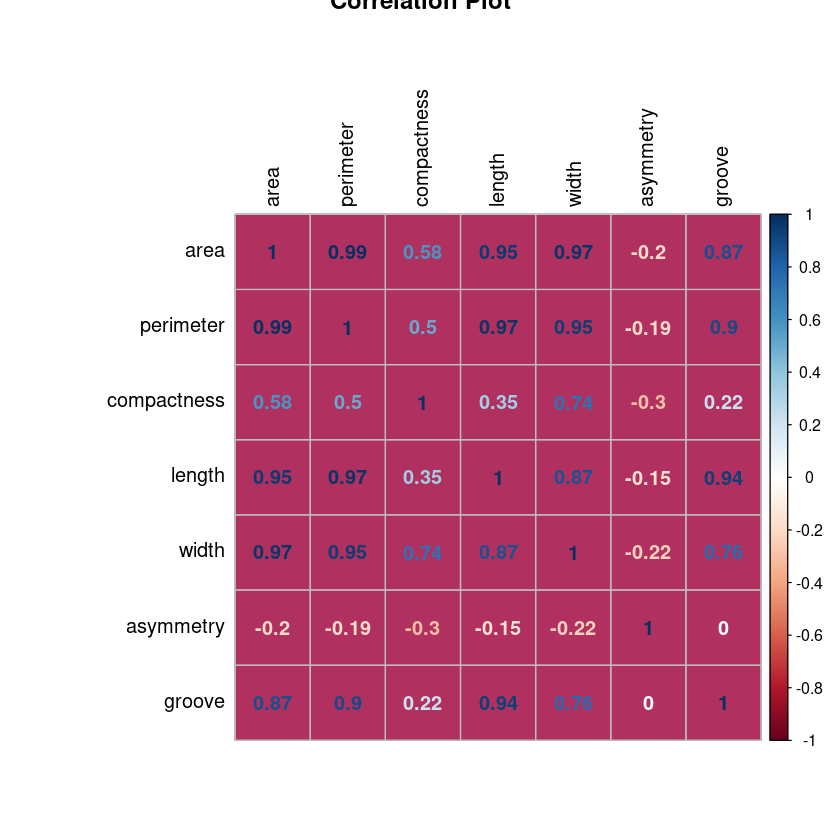

In [7]:
library(corrplot)
out = df[1:7]
relation = cor(out)
corrplot(relation, title='Correlation Plot', bg='maroon', method='number', tl.col='black')

In [9]:
intrain <- createDataPartition(y = df$type, p= 0.8, list = FALSE)
train <- df[intrain,]
test <- df[-intrain,]

In [10]:
train[["type"]] = factor(train[["type"]])

In [11]:
# using repeated CV with 5 folds

trctrl <- trainControl(method = "repeatedcv", number = 5)

In [12]:
# Using SVM with linear basis function

svm_linear <- train(type ~., data = train, method = "svmLinear",trControl=trctrl, tuneLength = 5) 

In [13]:
svm_linear

Support Vector Machines with Linear Kernel 

162 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 130, 130, 128, 130, 130 
Resampling results:

  Accuracy   Kappa    
  0.9378676  0.9067272

Tuning parameter 'C' was held constant at a value of 1

In [14]:
# let's apply our model to the test set 

test_pred <- predict(svm_linear, newdata = test)
test_pred

[1] A A A C A A A A A A A C A B B B B B B B B B B B B B C C C C C C C C C C A A
Levels: A B C

In [15]:
# Compute model prediction accuracy rate

mean(test_pred == test$type)

[1] 0.8947368

In [16]:
confusionMatrix(table(test_pred, test$type))

Confusion Matrix and Statistics

         
test_pred  A  B  C
        A 11  0  2
        B  0 13  0
        C  2  0 10

Overall Statistics
                                         
               Accuracy : 0.8947         
                 95% CI : (0.752, 0.9706)
    No Information Rate : 0.3421         
    P-Value [Acc > NIR] : 2.13e-12       
                                         
                  Kappa : 0.842          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8462   1.0000   0.8333
Specificity            0.9200   1.0000   0.9231
Pos Pred Value         0.8462   1.0000   0.8333
Neg Pred Value         0.9200   1.0000   0.9231
Prevalence             0.3421   0.3421   0.3158
Detection Rate         0.2895   0.3421   0.2632
Detection Prevalence   0.3421   0.3421   0.3158
Balanced Accuracy      0.8831   1.0000   0.8782

In [17]:
unknown = read.csv('/public/bmort/R/wheat-unknown.csv')
dim(unknown)

[1] 10  7

In [18]:
test_pred <- predict(svm_linear, newdata = unknown)
test_pred

[1] C A C C C C A C C B
Levels: A B C

In [19]:
unknown$type = test_pred

In [20]:
unknown

area,perimeter,compactness,length,width,asymmetry,groove,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.56,13.31,0.8198,5.363,2.683,4.062,5.182,C
14.79,14.52,0.8819,5.545,3.291,2.704,5.111,A
10.82,12.83,0.8256,5.180,2.630,4.853,5.089,C
13.32,13.94,0.8613,5.541,3.073,7.035,5.440,C
11.49,13.22,0.8263,5.304,2.695,5.388,5.310,C
10.83,12.96,0.8099,5.278,2.641,5.182,5.185,C
15.11,14.54,0.8986,5.579,3.462,3.128,5.180,A
11.19,13.05,0.8253,5.250,2.675,5.813,5.219,C
12.02,13.33,0.8503,5.350,2.810,4.271,5.308,C


### The accuracy of the model is 89.47%

## Even though Approach - 2 has slightly higher accuracy, I would say Approach - 1 is better as we removed outliers and scaled the data values in each column